# Introduction to PyTorch

  Study of PyTorch for computer vision. Study of methods for working with datasets, datasets transformation; datasets augmentation; study of autoencoder in PyTorch.

PyTorch - 
An open-source machine learning framework that accelerates the path from research prototyping to production deployment. The framework was designed by Facebook.
    For installing the last version of torch, please visit the section installed on the official website  https://pytorch.org/. 

\* For install without gpu chooses cpu from CUDA None subsection.

## Import torch

Let's for the first check aviliable of torch and its version.

In [1]:
import torch

print('version:',torch.version.__version__)

version: 2.4.0


Now we will import necessary libraries.

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

try:
    import torchinfo
except:
    !pip install torchinfo
finally:
    from torchinfo import torchinfo



In addition we will need to define some settings for `PyTorch` . The `PyTorch` support several types of devices, mainly  `CPU` and `GPU` form `NVidia` (i.e. `cuda`). However, the full list of devices for modern versions:  `cpu, cuda, xpu, mkldnn, opengl, opencl, ideep, hip, ve, ort, mlc, xla, lazy, vulkan, meta, hpu`.



In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print('Cuda is available:',torch.cuda.is_available())
    
    n_devices = torch.cuda.device_count()
    print('number of devices: %d'%(n_devices))
    
    for cnt_device in range(n_devices):
        print(torch.cuda.get_device_name(cnt_device))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(cnt_device)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(cnt_device)/1024**3,1), 'GB')


num_workers=os.cpu_count()
print ('available number of workers:',num_workers)
       
dtype = torch.float
torch.set_default_dtype(dtype) # float32
print('Current data type:',dtype)

Using device: cpu
available number of workers: 28
Current data type: torch.float32


In addition, for making your experiment more reproducible we will set the following 

In [7]:
seed = 42
torch.manual_seed(seed) #cpu
torch.cuda.manual_seed(seed) #gpu
np.random.seed(seed) #numpy
random.seed(seed) # random and transforms

torch.backends.cudnn.deterministic=True #cudnn
# torch.use_deterministic_algorithms(True)

[]()
For learning the initial principles of work you may visit those manuals
    
* [here for beginners](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html); 
* [examples](https://pytorch.org/tutorials/);
* [also examples](https://github.com/pytorch/examples).

---

## Data types


Basic type of data in the PyTorch - is the multidimensional array - i.e. so-called tensor. 

![image_tensor.png](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

The following examples of tensors are

In [8]:
x = torch.tensor(3.)
print(f'scalar: {x}, {x.ndim}-d dimention\n')

x = torch.tensor([3.,2])
print(f'vector: {x}, {x.ndim}-d dimention\n')

x = torch.tensor([[1.,2],[3.,4]])
print(f'matrix: \n{x},\n {x.ndim}-d dimention\n')

x = torch.tensor([[[1.,2],[3.,4]],[[5.,6],[7.,8]]])
print(f'set of matrix: \n{x},\n {x.ndim}-d dimention\n')
print(f' and so on')

scalar: 3.0, 0-d dimention

vector: tensor([3., 2.]), 1-d dimention

matrix: 
tensor([[1., 2.],
        [3., 4.]]),
 2-d dimention

set of matrix: 
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]]),
 3-d dimention

 and so on


Most of the operations with tensors in `PyTorch` are similar to the `NumPy`.

In [9]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

l = torch.FloatTensor([[5,6,7],[8,9,10]]) # tensor or defined type

n = torch.tensor([[0,1,2],[3,4,5]]).type(dtype) # тип по умолчанию

m = torch.from_numpy(np.ones([2,3], dtype=np.float32)) * 0.1 # need to select type manually

#-------------------
z = x + y*m + torch.exp(x)+torch.sqrt(n) + torch.pow(l,1.1)
print(z)

a = y[:,:1] + 1
print(a)

s = torch.transpose(z,0,1) #transposition with axis pointing

print(s.detach().cpu().numpy())

z = s@s.T #matrix multiplication
print(z)

z = s.matmul(s.T) #matrix multiplication
print(z)

tensor([[ 7.8101,  9.6437, 11.6166],
        [13.2706, 12.6141, 15.6690]])
tensor([[3.],
        [3.]])
[[ 7.81009  13.270558]
 [ 9.64367  12.614071]
 [11.616604 15.668995]]
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])


In [25]:
z = s.mm(s.T) #matrix multiplication
print(z)

z = torch.mm(y.T, m) #matrix multiplication
print(z)
z = s@s.T #matrix multiplication
print(z)

z = s.matmul(s.T) #matrix multiplication
print(z)

z = torch.mv(m.T,y[:,0]) #matrix to vector multiplication
print(z)

z = torch.dot(m[:,0],y[:,1]) #inner vector product
print(z)

tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([[0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000]])
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([0.4000, 0.4000, 0.4000])
tensor(0.4000)


In [20]:
x = torch.randn(2, 3)#.to('cuda')
x.device
x.cpu().data.numpy()

array([[ 1.5980384 ,  0.11148621, -0.0391967 ],
       [ 1.4111539 , -0.655611  ,  0.8576057 ]], dtype=float32)

In [27]:
z = x.clone()
z

tensor([[ 1.5980,  0.1115, -0.0392],
        [ 1.4112, -0.6556,  0.8576]])

However, there are several specific operations

In [33]:
print(z.view(1,- 1)) #reshape

print(z.view(1,1,-1))# exceed size

print(z.view(-1, 1)) #reshape
print(z.view(3, -1)) #reshape

tensor([[-1.6270, -1.3951, -0.2387,  2.0000,  2.0000,  2.0000, -0.5050, -2.4752,
         -0.9316,  2.0000,  2.0000,  2.0000]])
tensor([[[-1.6270, -1.3951, -0.2387,  2.0000,  2.0000,  2.0000, -0.5050,
          -2.4752, -0.9316,  2.0000,  2.0000,  2.0000]]])
tensor([[-1.6270],
        [-1.3951],
        [-0.2387],
        [ 2.0000],
        [ 2.0000],
        [ 2.0000],
        [-0.5050],
        [-2.4752],
        [-0.9316],
        [ 2.0000],
        [ 2.0000],
        [ 2.0000]])
tensor([[-1.6270, -1.3951, -0.2387,  2.0000],
        [ 2.0000,  2.0000, -0.5050, -2.4752],
        [-0.9316,  2.0000,  2.0000,  2.0000]])


In [38]:
print(z.unsqueeze(1)) #reshape
print(z.squeeze()) #reshape
print(z.ravel()) #reshape
print(z.permute((1,0))) #reshape

tensor([[[-1.6270, -1.3951, -0.2387,  2.0000,  2.0000,  2.0000]],

        [[-0.5050, -2.4752, -0.9316,  2.0000,  2.0000,  2.0000]]])
tensor([[-1.6270, -1.3951, -0.2387,  2.0000,  2.0000,  2.0000],
        [-0.5050, -2.4752, -0.9316,  2.0000,  2.0000,  2.0000]])
tensor([-1.6270, -1.3951, -0.2387,  2.0000,  2.0000,  2.0000, -0.5050, -2.4752,
        -0.9316,  2.0000,  2.0000,  2.0000])
tensor([[-1.6270, -0.5050],
        [-1.3951, -2.4752],
        [-0.2387, -0.9316],
        [ 2.0000,  2.0000],
        [ 2.0000,  2.0000],
        [ 2.0000,  2.0000]])


In [39]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

z = torch.cat([x,y]) #dim = 0
print(z.shape,x.shape,y.shape)

z = torch.cat([x,y], dim=1)
print(z.shape)

torch.Size([4, 3]) torch.Size([2, 3]) torch.Size([2, 3])
torch.Size([2, 6])


In [40]:
x = torch.randn(2, 3)
print(x.shape)
x = torch.stack((x, x))
print(x.shape)
x = torch.split(x,1)
print(x[0].shape, x[1].shape )

torch.Size([2, 3])
torch.Size([2, 2, 3])
torch.Size([1, 2, 3]) torch.Size([1, 2, 3])


Also, some operations in `PyTorch` exist in two variants: `immutable` with creating new output in the memory and `mutable` with rewriting variable with operation result.

In [41]:
x = torch.randn(2, 3)
y = torch.ones(2,3) * 2
print('inputs:\n',x,'\n',y,'\n');
z = torch.add(x,y)
print('result imutable\n',z)
x.add_(y)
print('\nresult mutable\n',x)

inputs:
 tensor([[ 2.1174, -1.7118,  0.1651],
        [ 1.5819,  0.4485,  0.0330]]) 
 tensor([[2., 2., 2.],
        [2., 2., 2.]]) 

result imutable
 tensor([[4.1174, 0.2882, 2.1651],
        [3.5819, 2.4485, 2.0330]])

result mutable
 tensor([[4.1174, 0.2882, 2.1651],
        [3.5819, 2.4485, 2.0330]])


Also `PyTorch` support so called `broadcasting` as property of making operations with different shape if sizes of last dimentions are the same or some of them 1.

In [42]:
x = torch.randn(  2,3)
y = torch.randn(2,2,3)
# print((x+y), end='\n\n')
print(f'Case 1: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(2,1,3)
y = torch.randn(2,  3)
# print((x+y), end='\n\n')
print(f'Case 2: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(2,1,1,1,1,3)
y = torch.randn(2, 2, 3)
print(f'Case 3: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(1,2,1,1,3)
y = torch.randn(2, 2, 3)
print(f'Case 4: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(5,6,3,3)
y = torch.randn(    3,3)
print(f'Case 5: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

Case 1: input x:torch.Size([2, 3]), y:torch.Size([2, 2, 3]), output torch.Size([2, 2, 3])

Case 2: input x:torch.Size([2, 1, 3]), y:torch.Size([2, 3]), output torch.Size([2, 2, 3])

Case 3: input x:torch.Size([2, 1, 1, 1, 1, 3]), y:torch.Size([2, 2, 3]), output torch.Size([2, 1, 1, 2, 2, 3])

Case 4: input x:torch.Size([1, 2, 1, 1, 3]), y:torch.Size([2, 2, 3]), output torch.Size([1, 2, 2, 2, 3])

Case 5: input x:torch.Size([5, 6, 3, 3]), y:torch.Size([3, 3]), output torch.Size([5, 6, 3, 3])



Also some operations support pointing the output as argument

In [14]:
x = torch.randn(2, 3)
y = torch.ones(2,3) * 2

d = torch.zeros_like(x)

torch.add(x,y,out = d)
print(d)

tensor([[ 1.8966,  2.6950, -0.1815],
        [ 1.9403,  1.6558,  1.1264]])


The simple assignment operator assumes sharing the same memory. 

If you want to create a new object in the memory use clone method.

In [15]:
a = x
b = x.clone()
print(a)
x[0,0]=100
print(a)
print(b)

tensor([[-0.1034,  0.6950, -2.1815],
        [-0.0597, -0.3442, -0.8736]])
tensor([[ 1.0000e+02,  6.9503e-01, -2.1815e+00],
        [-5.9702e-02, -3.4418e-01, -8.7358e-01]])
tensor([[-0.1034,  0.6950, -2.1815],
        [-0.0597, -0.3442, -0.8736]])


Also you may carring operations on the `CPU` or predefined device using method `to()`. In this case to return tensor on the `CPU` use method `cpu()`.

In [43]:
x = torch.tensor([1,2]).to(device)
print(x.is_cuda)
print(x.cpu().is_cuda)

False
False


### Specific methods for Neural Networks in PyTorch

### Activation functions

In [44]:
data = torch.randn(2, 2)
print(data)
print(torch.relu(data))

tensor([[ 0.6364, -0.0843],
        [-0.1415, -0.9698]])
tensor([[0.6364, 0.0000],
        [0.0000, 0.0000]])


In [18]:
data = torch.randn(2, 2)
print(data)
print(torch.sigmoid(data))

tensor([[ 2.1274, -0.2967],
        [-1.1284,  0.2457]])
tensor([[0.8935, 0.4264],
        [0.2445, 0.5611]])


In [19]:
data = torch.randn(2, 2)
print(data)
print(torch.tanh(data))

tensor([[-0.0576, -0.2223],
        [-0.4736,  0.4768]])
tensor([[-0.0575, -0.2187],
        [-0.4411,  0.4437]])


#### Layers

In [45]:
# Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
import torch
from torch import nn

lin = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(2, 5)
print(lin(data)) 
print(lin(data).size()) 

tensor([[-0.3658,  1.2377,  0.7985],
        [ 0.1375,  0.4912,  0.3505]], grad_fn=<AddmmBackward0>)
torch.Size([2, 3])


In [46]:
import torch.nn.functional as F
F.celu(data)

tensor([[-0.8670,  0.7358,  0.4303, -0.4709, -0.2375],
        [-0.5224,  1.6475, -0.3963,  0.7850,  0.3700]])

In [47]:
# Applies a 1D convolution over an input signal composed of several input planes.

lin = nn.Conv1d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)  
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(1, 5, 2)
print(lin(data)) 
print(lin(data).size()) 

tensor([[[ 1.1269],
         [-0.6954],
         [-0.0178]]], grad_fn=<ConvolutionBackward0>)
torch.Size([1, 3, 1])


In [48]:
# Applies a 1D max pooling over an input signal composed of several input planes.

lin = nn.MaxPool1d(kernel_size = 2,
                   stride      = 1)  
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(1, 5, 2)
print(lin(data)) 
print(lin(data).size()) 

tensor([[[0.1372],
         [1.5912],
         [0.6075],
         [1.2248],
         [0.0478]]])
torch.Size([1, 5, 1])


In [49]:
# Applies a 2D convolution over an input signal composed of several input planes.

lin = nn.Conv2d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)  

data = torch.randn(1, 5, 4, 2)
print(lin(data)) 
print(lin(data).size()) 

tensor([[[[-0.2726],
          [-0.2314],
          [-0.8977]],

         [[-0.1540],
          [ 0.6404],
          [ 0.2900]],

         [[ 0.6774],
          [ 0.4600],
          [-0.1222]]]], grad_fn=<ConvolutionBackward0>)
torch.Size([1, 3, 3, 1])


In [50]:
# Applies a multi-layer Elman RNN with :math:`tanh` or :math:`ReLU` non-linearity to an input sequence.

rnn  = nn.RNN(3, 2, 2) 
data = torch.randn(3, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, hn = rnn(data, h0)
print(output) 
print(output.size())

tensor([[[ 0.2742, -0.4549],
         [ 0.6135, -0.1757]],

        [[ 0.7170,  0.3800],
         [-0.0119,  0.4903]],

        [[ 0.7564,  0.5875],
         [-0.0921,  0.2818]]], grad_fn=<StackBackward0>)
torch.Size([3, 2, 2])


In [126]:
# Applies a multi-layer long short-term memory (LSTM) RNN to an input sequence.

rnn  = nn.LSTM(3, 2, 2) 
data = torch.randn(2, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, (hn, cn) = rnn(data, (h0, c0))
print(output) 
print(output.size()) 

tensor([[[-0.0945, -0.0408],
         [-0.0124,  0.0274]],

        [[ 0.0073,  0.0428],
         [ 0.0249,  0.0796]]], grad_fn=<MkldnnRnnLayerBackward0>)
torch.Size([2, 2, 2])


## Automatic differentiation

Each of the operation in the torch is the graph of computations

![softmax_graph.png](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1520609448/comp_graph_oncyni.png)

PyTorch support automatic differentiation when the corresponding argument is set for tensor.

In [127]:
x = torch.tensor([3.,4.])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)

print(x,w,b)

tensor([3., 4.]) tensor([4., 8.], requires_grad=True) tensor(5., requires_grad=True)


you may use variables in the same as tensors.

In [130]:
y = w @ x + b
print(y)

tensor(49., grad_fn=<AddBackward0>)


In [132]:
print(y.grad_fn)

Let's assume we have some labels and we can calculate error of our simple linear model.

In [133]:
y_label = torch.tensor([40])
error = y_label - y #loss function
error

tensor([-9.], grad_fn=<SubBackward0>)

Than we can take the automatic gradient by using `backward` method.  

In [136]:
print('current gradient:',x.grad,w.grad,b.grad)

de = torch.sum(error).backward(retain_graph=True)

print(''' sum of de/dw:''', w.grad)
print('sum of de/db:', b.grad)

with torch.no_grad():
    
    w -= w.grad 
    b -= b.grad 
    
    w.grad.data.zero_()
    b.grad.data.zero_()
  

print( w.grad, b.grad)

current gradient: None tensor([0., 0.]) tensor(0.)
 sum of de/dw: tensor([-3., -4.])
sum of de/db: tensor(-1.)
tensor([0., 0.]) tensor(0.)


We can also make manual updating of new weights, for this it is highly recommended to use `with torch.no_grad()` directive.

In [137]:
LR = 0.01 # learning rate

x       = torch.tensor([3.,4.])
y_label = torch.tensor([40])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)

y = x*w+b

error = y_label - y

loss = error.square().sum()

loss.backward(retain_graph=True)

# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * LR
    b -= b.grad * LR
    w.grad.zero_()
    b.grad.zero_()

For making automatic difference `PyTorch` build dynamic computational graph. You may learn it using `torchviz` library for graph visualization.
```python
    try:
        import torchviz
    except:
        !pip install torchviz
        !pip install graphviz
    finally:
        from torchviz import make_dot
    from torch import nn
    model = nn.Sequential()
    model.add_module('W0', nn.Linear(8, 16))
    x = torch.randn(1,8)
    y = model(x)
    make_dot(y, params=dict(model.named_parameters()))
```




![torch_graph](https://miro.medium.com/max/700/1*K2QnR_TRF9XfqNgNGDRqng.png)

---

## Linear regression PyTorch

For the first let's analyze linear regression example 

$y=а\cdotх+b$

where:
*  $а$ is the slope.
* $b$ — is the bias.


In the matrix Form

$ y =  X \cdot W^T + b$

where:
* X - is the input tensor;
* W - is the weights tensor without bias, for instance, W = a;
* b - is the bias tensor (with less on one dim in comparison with  W);
* y - output tensor.

In the practice, W can include b as one of the part


![lineRegression](https://coderlessons.com/wp-content/uploads/2019/07/interpreting_result-1.jpg)

### Manual implementation PyTorch 

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torch.nn as nn
from torch.autograd import Variable
%matplotlib inline

torch.manual_seed(1969)

# import seaborn as sns
# import pandas as pd
# sns.set_style(style = 'whitegrid')
# plt.rcParams["patch.force_edgecolor"] = True

dataset

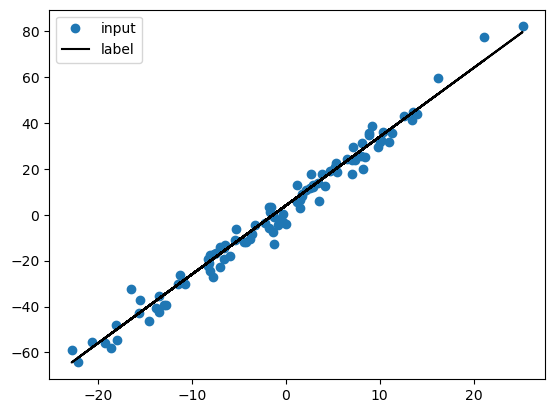

In [139]:
x = torch.randn(100, 1) * 10
y_clear = 3*x + 4
y = y_clear + 5 * torch.randn(100, 1)

plt.plot(x,y,'o', label = 'input')
plt.plot(x,y_clear,'-k', label = 'label')
plt.legend()
plt.show()

In [66]:
# inputs  = torch.from_numpy(x)
# targets = torch.from_numpy(y)
inputs = x
targets = y
print(inputs.shape)

torch.Size([100, 1])


weights and bias

In [158]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([2.0988], requires_grad=True)
tensor([-0.0327], requires_grad=True)


model

In [159]:
def model(x,w,b):
    return x * w + b

loss function

$ MSE = \sum (y-x)^2 / N$

In [160]:
def mse(predicts, targets):
    diff = torch.abs(predicts - targets)
    return torch.sum(diff * diff) / diff.numel()

initial error

In [161]:
predicts = model(inputs,w,b)
# print(predicts)

loss = mse(predicts, targets)
print('loss = ',loss.data.numpy())


loss =  105.76493


one backward step (gradient)

In [162]:
predicts = model(inputs,w,b)
loss = mse(predicts, targets)
loss.backward()
db = b.grad
dw = w.grad


weighs updating

In [163]:
LR = 0.005

# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * LR
    b -= b.grad * LR
    w.grad.zero_()
    b.grad.zero_()



let's make 100 epochs of weights updating

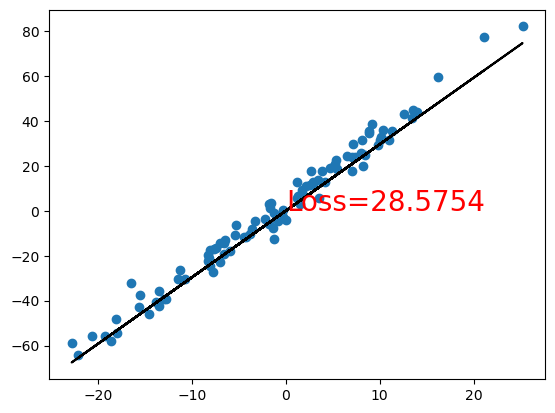

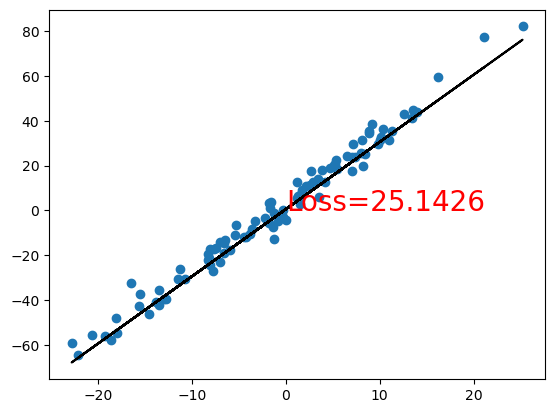

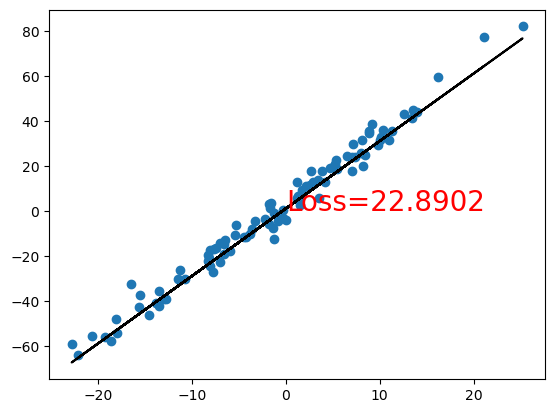

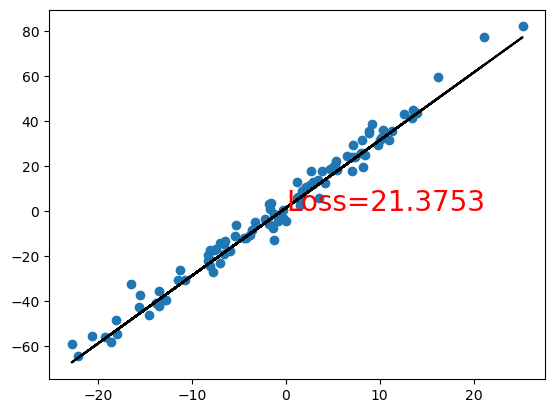

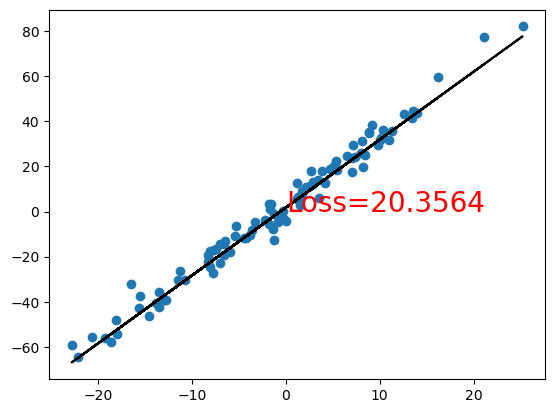

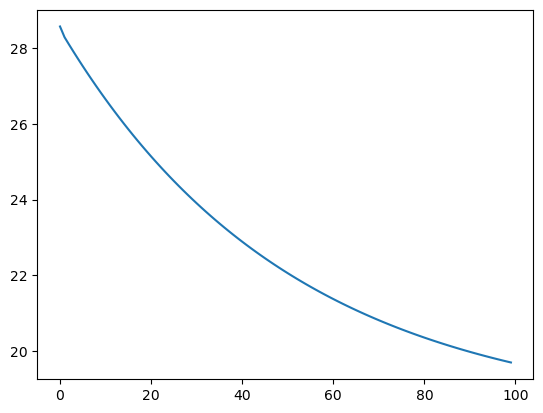

In [164]:
epochs = 100
LR = 0.005 

trainig = np.zeros(epochs)
for i in range(epochs):
    predicts = model(inputs,w,b)
    loss = mse(predicts, targets)
    trainig[i] = loss.data.numpy()
    loss.backward()
    with torch.no_grad():
        w -= w.grad * LR
        b -= b.grad * LR
        w.grad.zero_()
        b.grad.zero_()

    if(i%20 == 0):
        plt.plot(x,targets.data.numpy(),'o')
        plt.plot(x,predicts.data.numpy(),'-k')
        plt.text(0.1, 0.1, 'Loss=%.4f' %(trainig[i]), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        
plt.plot(trainig)
 

let's test the model

In [165]:
predicts = model(inputs,w,b)
loss = mse(predicts, targets)
print(loss)


tensor(19.6711, grad_fn=<DivBackward0>)


obtained values of slope and shift

In [166]:
print(w)
print(b)

tensor([3.0157], requires_grad=True)
tensor([2.0140], requires_grad=True)


**results**

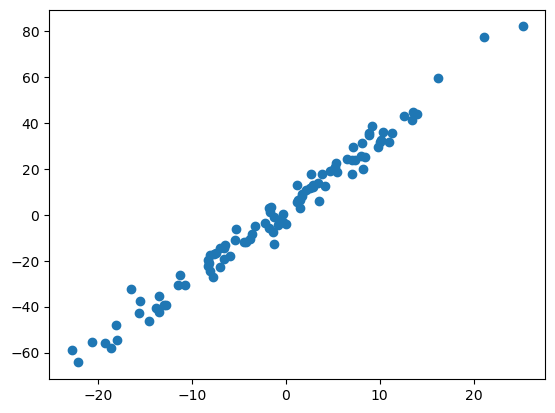

In [121]:
plt.plot(x,targets.data.numpy(),'o')
plt.plot(x,predicts.data.numpy(),'-k')

### Regression in  PyTorch  with built-in methods

Let's create regression class. 

!In the PyTorch it is necessary to implement you methods using class as classes inherited from nn.Module!

In [167]:
class LinearRegression(nn.Module):
    
    def __init__(self, in_features=1, out_features=1 ):
        super().__init__()
        self.l1 = nn.Linear(in_features=in_features, out_features=out_features)
    
    def forward(self, x):
        return self.l1(x)
    


Also you can use Sequential conteiner, but we not reccommend to use it

In [168]:
model = nn.Sequential(nn.Linear(in_features=1, out_features=1))
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

our model in class form 

In [169]:
model = LinearRegression(1,1)
model

LinearRegression(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)

Select Stochastic Gradient  Descent as optimizer

In [172]:
LR = 0.01
criterion = nn.MSELoss()

param = model.parameters()

optimizer = torch.optim.SGD(param, lr=LR)

w,b   = model.parameters()
print(w,b)

Parameter containing:
tensor([[0.2033]], requires_grad=True) Parameter containing:
tensor([-0.5743], requires_grad=True)


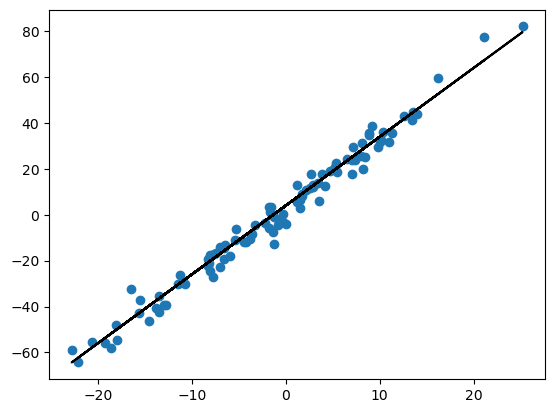

In [174]:
plt.plot(x,y,'o')
plt.plot(x,y_clear,'-k')


test

Epoch:  1  Loss:  18.531089782714844
Epoch:  21  Loss:  18.383708953857422
Epoch:  41  Loss:  18.31761932373047
Epoch:  61  Loss:  18.28786849975586
Epoch:  81  Loss:  18.27446174621582


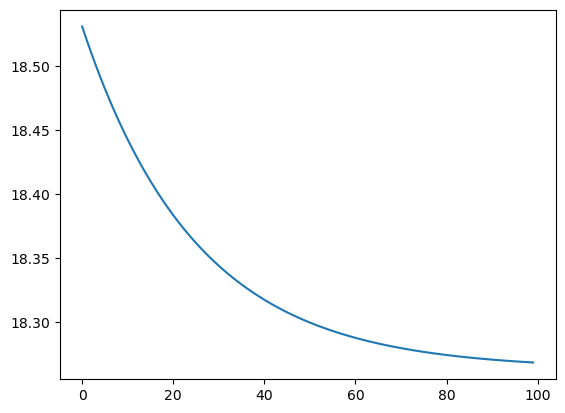

In [176]:
epochs = 100
losses = np.zeros(epochs)

for i in range(epochs):
    #FORWARD
    predict = model.forward(x)
    loss = criterion(predict, y)
    #BACKWARD
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses[i] = loss.data.numpy()
    if(i//20 == i/20):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

In [179]:
[w, b]    = model.parameters()
print(w[0],b[0])


tensor([3.0289], grad_fn=<SelectBackward0>) tensor(3.1374, grad_fn=<SelectBackward0>)


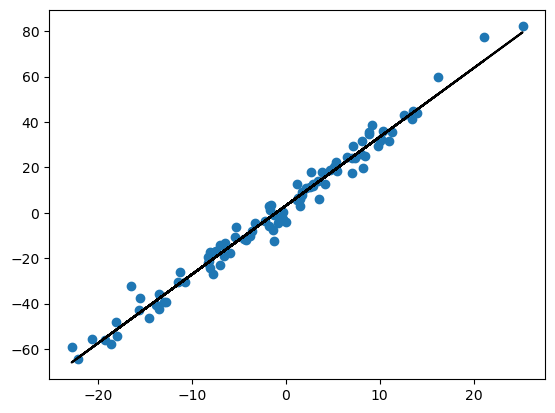

In [180]:
with torch.no_grad():
    predict = model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

**Let's look on the data you may obtain from the model**

In [181]:
print(list(model.parameters()))

print(list(model.state_dict()))

# print(list(model.named_buffers()))
print(list(model.named_parameters()))

[Parameter containing:
tensor([[3.0289]], requires_grad=True), Parameter containing:
tensor([3.1374], requires_grad=True)]
['l1.weight', 'l1.bias']
[('l1.weight', Parameter containing:
tensor([[3.0289]], requires_grad=True)), ('l1.bias', Parameter containing:
tensor([3.1374], requires_grad=True))]


In [182]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters for the model: %d' % (num_params))

num_params = sum(p.numel() for p in model.parameters() )
print('Number of all parameters for the model: %d' % (num_params))

Number of trainable parameters for the model: 2
Number of all parameters for the model: 2


beside this you may use method ```summary``` from the library ```torchsummary```

In [183]:
summary(model,input_size = x.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


now we can try to save the model

In [184]:
torch.save(model.state_dict(), 'test_module.pt')

and to delete it

In [185]:
del(model)

So, we can upload it, but with 
a new name, for instance ```new_model```

In [187]:
new_state_dict = torch.load('test_module.pt', weights_only=True)
new_model = LinearRegression(1,1)
new_model.load_state_dict(new_state_dict)

<All keys matched successfully>

let's test new_model

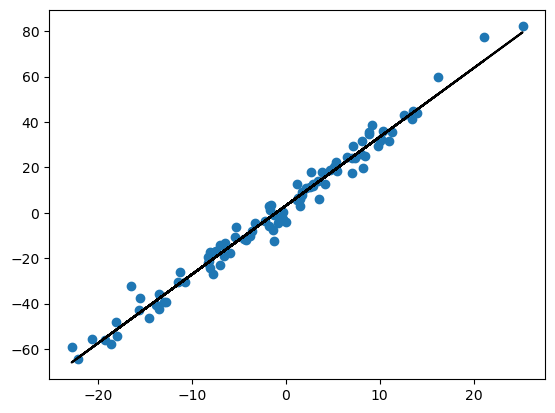

In [188]:
predict = new_model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

Also we can save it using JIT scripts, it would be useful if you are going to use the model in other frameworks

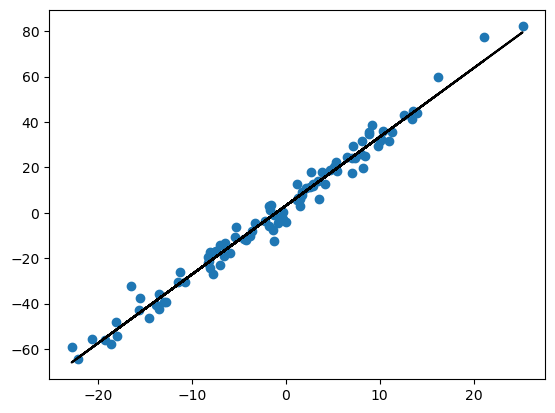

In [190]:
scripted_module = torch.jit.script(new_model)
torch.jit.save(scripted_module, 'mymodule.pt')
again_new_model = torch.jit.load('mymodule.pt')

predict = again_new_model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

### Exercise 1

Implement square regression using PyTorch
$y = w_1\cdot x^2 + w_2\cdot x + b = w_1\cdot x_1 + w_2\cdot x_2 + b$

### Exercise 2

Instead of using implementation above, you may apply standart template, one fo them `Sequential` 
that can applied, like it is shown below 
```python 
model = nn.Sequential(nn.Linear(n_inputs, n_outputs)) 
```
Omplement linear regression using `Sequential`

---

## Logistic regression with PyTorch

dataset

In [195]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection  import train_test_split

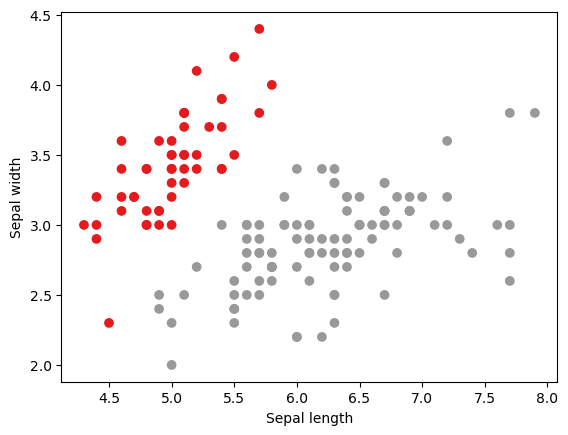

In [196]:
iris = datasets.load_iris()

x = iris.data[:, :2]
y = (iris.target != 0) 

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

split data

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


class for model

In [198]:
class LogisticRegression(nn.Module):
    
    def __init__(self, in_features=2, n_classes=1 ):
        super().__init__()
        self.l1 = nn.Linear(in_features=in_features, out_features=n_classes)
#         self.sig = nn.Sigmoid()
    def forward(self, x):
        return torch.sigmoid(self.l1(x))



model parameters

In [199]:
LR = 0.1

model = LogisticRegression()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

w,b   = model.parameters()
print(w,b)

summary(model,input_size = x.shape[1:])

Parameter containing:
tensor([[ 0.1461, -0.2691]], requires_grad=True) Parameter containing:
tensor([-0.0484], requires_grad=True)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


training

Epoch:  1  Loss:  0.626330554485321
Epoch:  21  Loss:  0.4653538167476654
Epoch:  41  Loss:  0.4089239537715912
Epoch:  61  Loss:  0.36505359411239624
Epoch:  81  Loss:  0.3302976191043854


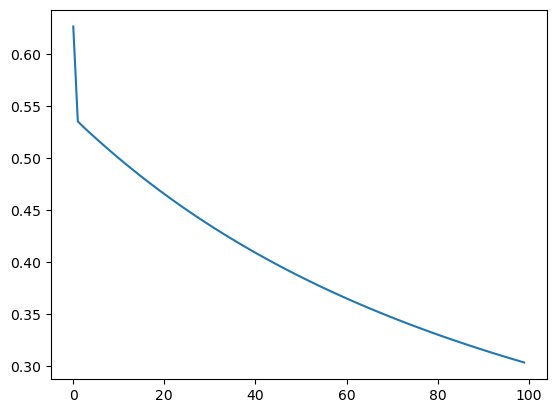

In [200]:
epochs = 100
losses = np.zeros(epochs)

for i in range(epochs):
    predict = model.forward(x_train)
    
    loss = criterion(predict, y_train)

    losses[i] = loss.data.numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//20 == i/20):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

evaluation

In [201]:
predict = model.forward(x_test)

In [202]:
print(torch.mean(torch.round(predict)-torch.round(y_test)).data)

tensor(0.)


visualization of results

Text(0.5, 1.0, 'Predicted FOR ALL')

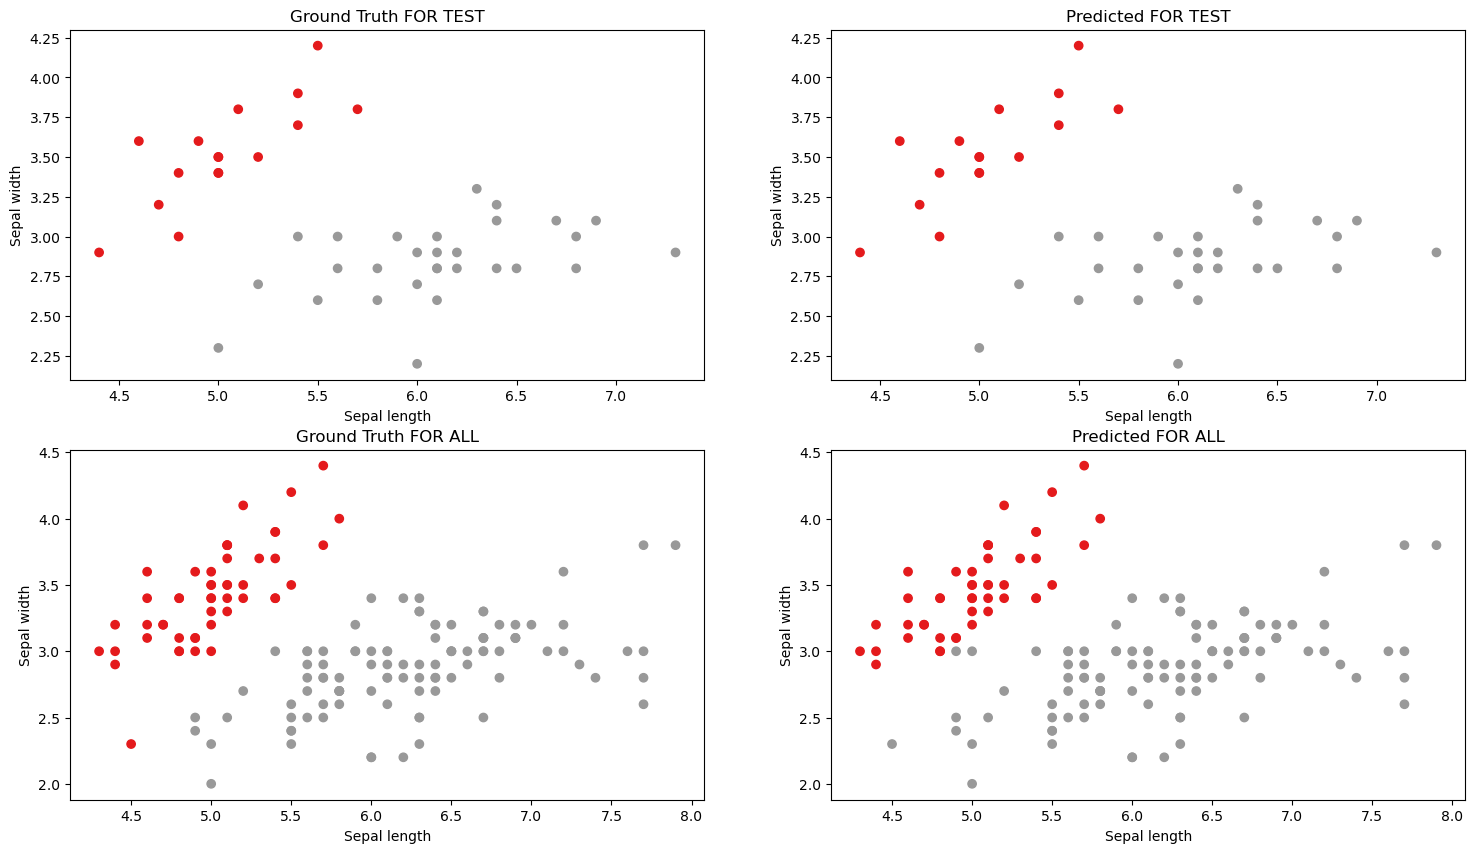

In [203]:
plt.figure(figsize=(18,10))

plt.subplot(221)
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=torch.squeeze(y_test), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')

predict = model.forward(x_test)

plt.subplot(222)
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR TEST')

predict = model.forward(torch.from_numpy(x.astype(np.float32)))

plt.subplot(223)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(y)), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR ALL')
 
plt.subplot(224)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR ALL')

---

### Softmax regression example

dataset with three classes

In [204]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

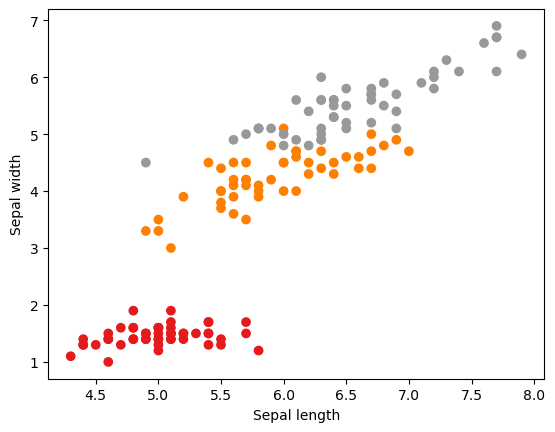

(150, 2)
(150,)
torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


In [205]:
iris = datasets.load_iris()

x = iris.data[:,[0,2] ]
y = (iris.target) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# standardize
x[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

print(x.shape)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model

In [206]:
class SoftmaxRegression(LogisticRegression):    
    
    def __init__(self, 
                 in_features = 2, 
                 n_classes   = 3):
        
        super().__init__(in_features = in_features, 
                         n_classes   = n_classes)
    
    def forward(self, x):
        return torch.nn.functional.softmax(self.l1(x), dim=1)

training

In [207]:
LR = 0.1

model = SoftmaxRegression(x_train.shape[1],3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

w,b   = model.parameters()
print(w,b)
summary(model,input_size = x.shape[1:])

Parameter containing:
tensor([[-0.5606, -0.4163],
        [ 0.0841,  0.6785],
        [ 0.2353,  0.3069]], requires_grad=True) Parameter containing:
tensor([ 0.0529, -0.1612,  0.4073], requires_grad=True)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 3]               9
Total params: 9
Trainable params: 9
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Epoch:  1  Loss:  0.937254786491394
Epoch:  81  Loss:  0.8387974500656128
Epoch:  161  Loss:  0.8186300992965698
Epoch:  241  Loss:  0.8049776554107666
Epoch:  321  Loss:  0.792836606502533


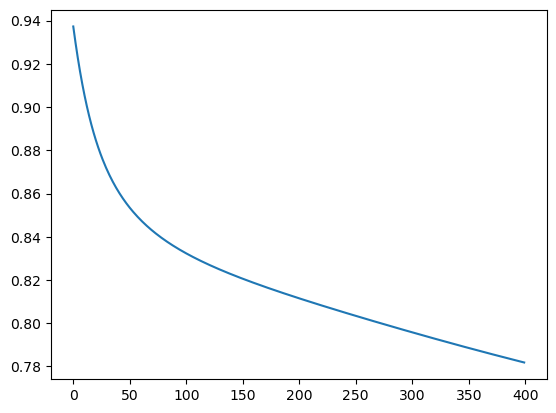

In [208]:
epochs = 400
losses = np.zeros(epochs)

for i in range(epochs):

    predict = model.forward(x_train)

    loss = criterion(predict, torch.squeeze(y_train).type(torch.long))

    losses[i] = loss.data.numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//(epochs//5) == i/(epochs//5)):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

evaluation

raw output of softmax (without max)

torch.Size([150, 3])


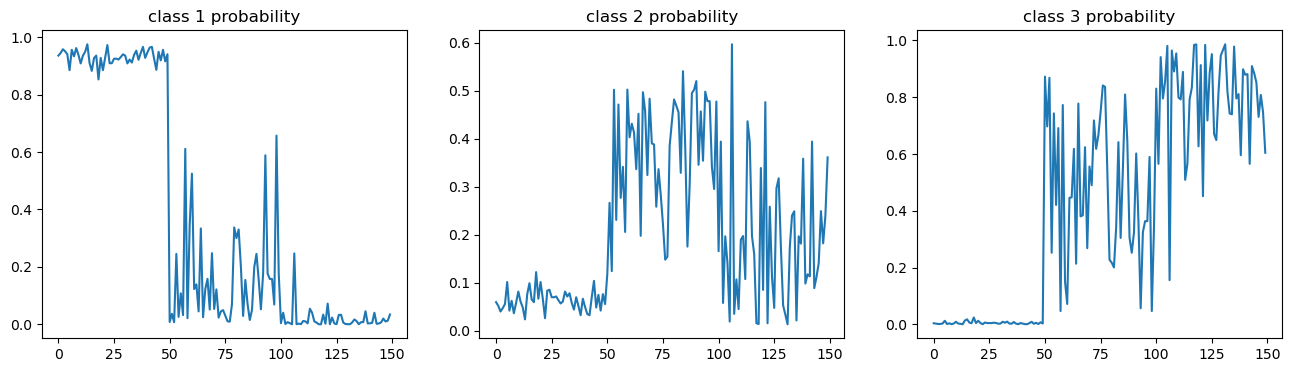

In [209]:
predict = model.forward(torch.from_numpy(x).type(torch.float))
print(predict.shape)
plt.figure(figsize = (16,4))
plt.subplot(1,3,1);plt.plot(predict.data.numpy()[:,0]);plt.title('class 1 probability')
plt.subplot(1,3,2);plt.plot(predict.data.numpy()[:,1]);plt.title('class 2 probability')
plt.subplot(1,3,3);plt.plot(predict.data.numpy()[:,2]);plt.title('class 3 probability')
plt.show()

output of the model

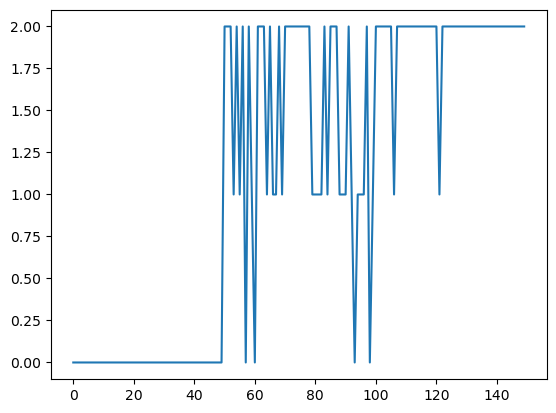

In [210]:
lables_predicted = predict.data.numpy().argmax(axis=1)
lables_predicted.shape
plt.plot(lables_predicted)

visualization

Text(0.5, 1.0, 'Predicted FOR ALL')

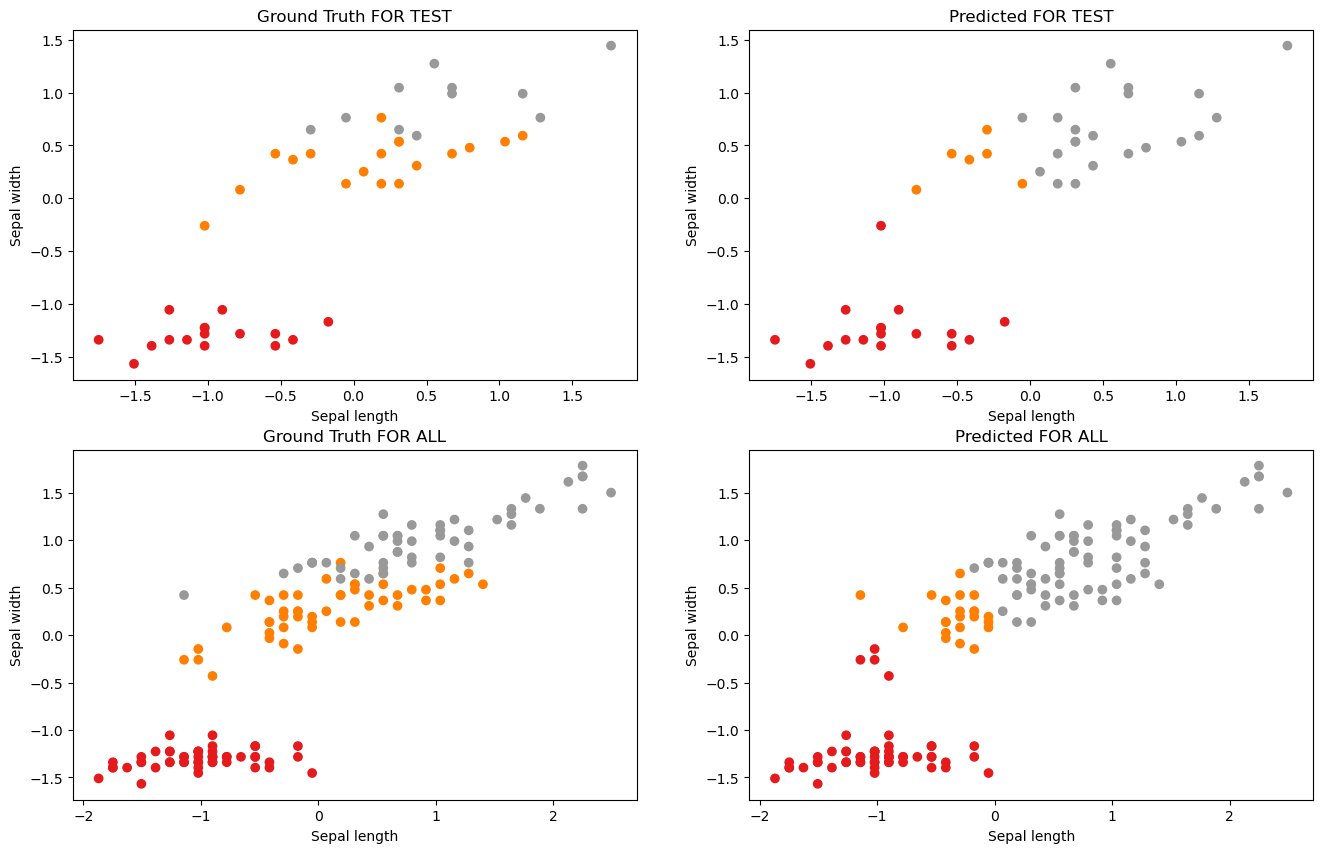

In [211]:
plt.figure(figsize=(16,10))

plt.subplot(221)
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=torch.squeeze(y_test), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')



predict = model.forward(x_test)
lables_predicted = predict.data.numpy().argmax(axis=1)

plt.subplot(222)
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=lables_predicted, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR TEST')


predict = model.forward(torch.from_numpy(x.astype(np.float32)))
lables_predicted = predict.data.numpy().argmax(axis=1)

plt.subplot(223)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(y)), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR ALL')

plt.subplot(224)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=lables_predicted, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR ALL')


### Exercise  3
Implement the model using 
```python 
Sequential
```



<details>
<summary>Click here for hint</summary>

```python 
    
    model = nn.Sequential(
        nn.Linear(in_features=x_train.shape[1], out_features=1), 
        nn.Sigmoid()    )    
    
```

</details>

---

## Full connected neural network with PyTorch

Let's test torch in the fully connected network training problem

![MLP](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSy34_CeT3sV3jpkCm7GqZWSqfbdapSUaAQ2A&usqp=CAU)

In [212]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

We will use the popular MNIST dataset.

The MNIST dataset (Modified National Institute of Standards and Technology) is a database of handwritten digits (0--9) - one of the most popular dataset in the computer vision.

The MNIST contains 60,000 training images and 10,000 testing images.

Each image has dimensions of 28 by 28 pixels in grayscale. 

We will load data using the `torchvision` library. 

For dataset we will use transformations determined by `transforms.Compose` function. 

After all we will use the `torch.utils.data.DataLoader()` function to prepare the data loading for training and testing datasets.
<!-- https://www.pluralsight.com/guides/building-deep-learning-networks-with-pytorch-->


In [216]:
BATCH_SIZE = 64

transform=transforms.Compose([
                           transforms.ToTensor()
                            ])

train = torchvision.datasets.MNIST('', 
                                   train=True, 
                                   download=True,
                                   transform  = transform)

test  = torchvision.datasets.MNIST('', 
                                   train=False, 
                                   download=True,
                                   transform =transform)

trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)

testset  = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)


In [217]:
trainset_shape = trainset.dataset.data.shape
testset_shape  = testset.dataset.data.shape

print(trainset_shape, testset_shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [218]:
images, _ = dataiter = next(iter(trainset))
images.shape

torch.Size([64, 1, 28, 28])

In [219]:
import matplotlib.pyplot as plt
import numpy as np
def image_show(images):
    images = images.numpy()
    images = images.transpose((1, 2, 0))
    print(images.shape)
    plt.imshow(images)
    plt.show()

(233, 233, 3)


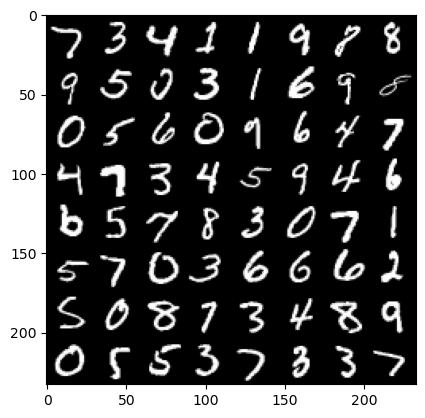

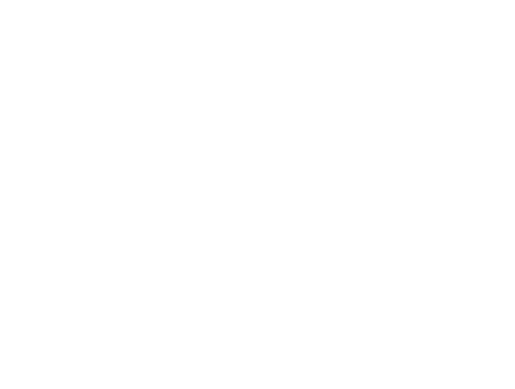

In [220]:
# get some random training images batch
images, _ = dataiter = next(iter(trainset))
# image_show(torchvision.utils.make_grid(images, nrow = 8, padding = 1))

## show images
image_show(torchvision.utils.make_grid(images[:,:,:,:], nrow = 8, padding = 1)); plt.axis('off'); plt.show()

Model Training

We create a class Net for the model. The model contains 3 layers. Each hidden layers contains 64 outputs. The only change in the output layer is 10 outputs, representing ten classes of the images.

For hidden layers we will use `relu` or Rectified Linear Activation function.
For the output layer, we'll use the `softmax` function, often used for a multi-class classification problem.

*Note* instead of just `softmax` we will use `log(softmax(x))` due to the requirement of the loss function implementation.


In [221]:
IMAGE_WIDTH = 28 
IMAGE_HEIGH = 28

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(IMAGE_WIDTH*IMAGE_HEIGH, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)   #log(softmax(x))
     

In [222]:
net = Net()
# print(net)
summary(net,input_size =(1,784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
            Linear-2                [-1, 1, 64]           4,160
            Linear-3                [-1, 1, 10]             650
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.21
Estimated Total Size (MB): 0.21
----------------------------------------------------------------


We’ll use the adam optimizer to optimize the network. 
We’ll use the cross entropy as loss function. 
The `lr` argument specifies the learning rate of the optimizer function.

In [223]:
criterion = nn.CrossEntropyLoss() #This criterion requires `log_softmax` 
optimizer = optim.Adam(net.parameters(), lr=0.005)

Training. 
 
 We’ll have five full passes over the data (5 epochs).

The function `net.zero_grad()` sets gradients to zero before the loss calculation. 
The function `net(X.view(-1,784))` allows to reshape the images in the batch into the 1-D vectors. 
The number 784 is a result of the 28 by 28 image dimensions.

The `criterion(output, y)` function calculates the loss value. 

 The last line of the code prints the loss for each epoch

In [224]:
EPOCHS = 5

for epoch in range(EPOCHS): 
    net.train()
    for data in trainset:  
        X, y = data  
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = criterion(output, y)  
        loss.backward()  
        optimizer.step()  
    print('[epoch:%d/%d]'%(epoch,EPOCHS), 'loss val = %.4f'%(loss.item()) )


[epoch:0/5] loss val = 0.0400
[epoch:1/5] loss val = 0.0393
[epoch:2/5] loss val = 0.0723
[epoch:3/5] loss val = 0.0331
[epoch:4/5] loss val = 0.0154


next step is to evaluate the model on the test data set.

In [225]:
correct = 0
total   = 0

net.eval()
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.97


### Exercise 5
1. Try to transform the network to the autoencoder problem.
> for vector to image transform use  X.view(-1,28,28)

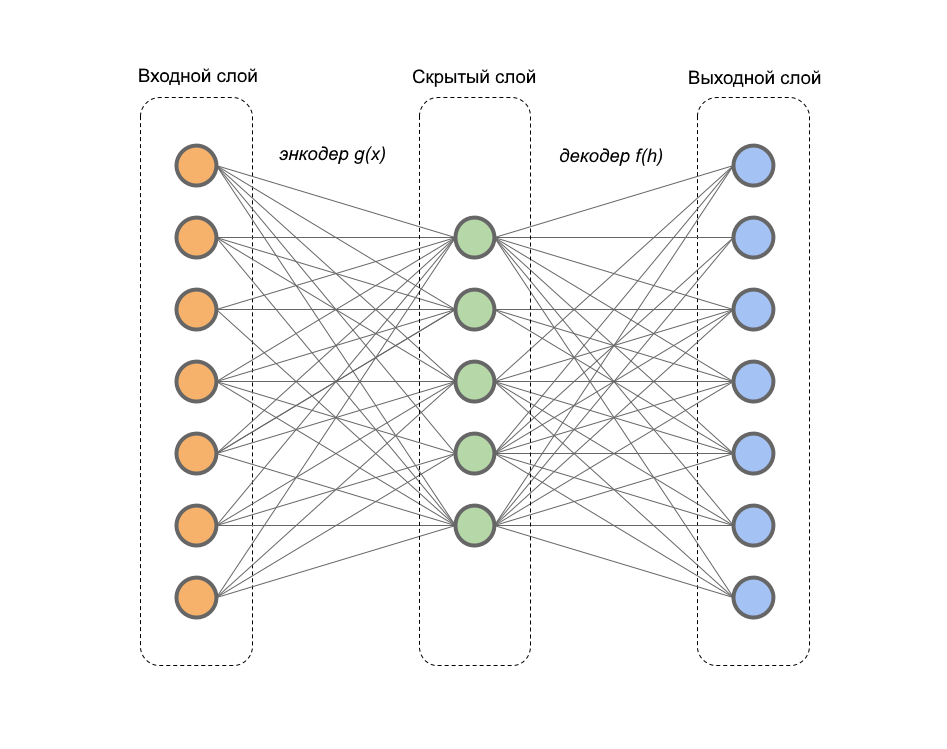

Besides just working with the dataset as itself we can increase dataset size using augmentation techniques.
This operation can be done statically (before training, not recommended), or dynamically (during batch upload). The last one can be done through the transforms as is shown below.

In [174]:
transform = transforms.Compose([
                                transforms.Resize((32, 32)), 
                                transforms.RandomCrop(28),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                               ])


train = torchvision.datasets.MNIST('', 
                                   train=True, 
                                   download=True,
                                   transform  = transform)

test  = torchvision.datasets.MNIST('', 
                                   train=False, 
                                   download=True,
                                   transform =transform)

trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)

testset  = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)


(233, 233, 3)


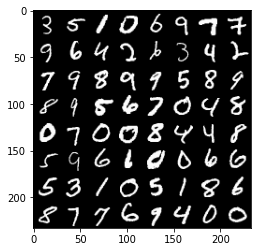

In [309]:
images, _ = dataiter = next(iter(trainset))
image_show(torchvision.utils.make_grid(images, nrow = 8, padding = 1))

Below you may find more complex transformations pipeline.<br> 
*Note*  `PyTorch` allows you to work natively with the `numpy`, `Pillow` (`PIL`) and `tensor` formats of images.

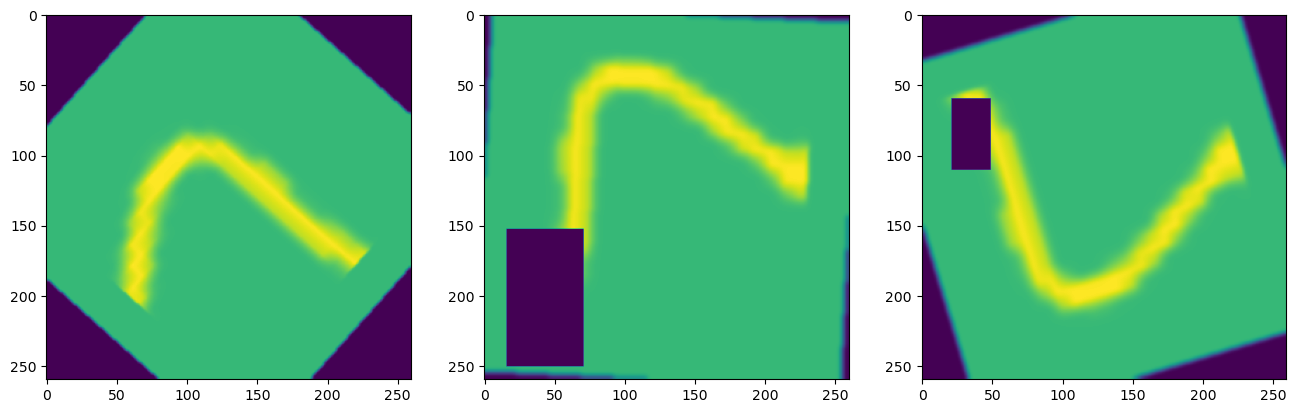

In [227]:
import torchvision.transforms as T

to_pil = T.ToPILImage()
img = to_pil(images[0])

padding = 30
kernel_size = 53

preprocess = T.Compose([
               T.ToTensor(),
               T.Resize(300),
               T.CenterCrop(250),
               T.RandomCrop(200),
               T.Pad(padding=padding),               
               lambda x:x**2+2,
               T.RandomRotation(degrees=180),
               T.RandomPerspective(distortion_scale=0.6, p=0.3),
               T.GaussianBlur(kernel_size=kernel_size),    
               T.RandomApply([T.RandomErasing(),T.RandomHorizontalFlip()],p=0.6), 
               T.Normalize(mean=[0.5],std=[0.225])
                ])

plt.figure(figsize = (16,8))

x = preprocess(img)
plt.subplot(131);plt.imshow(x[0,:,:])

x = preprocess(img)
plt.subplot(132); plt.imshow(x[0,:,:])

x = preprocess(img)
plt.subplot(133); plt.imshow(x[0,:,:])

Actually, you may work with images as with `PIL` object and then transform it backwards to tensor.

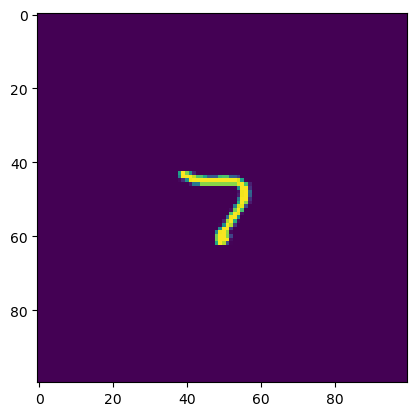

In [228]:
from PIL import Image

to_pil = transforms.ToPILImage()
img = to_pil(images[0])

transforms.ToTensor()

center_crops = transforms.CenterCrop(size=100)(img) 
center_crops.show()

torch_image = transforms.ToTensor()(center_crops)
plt.imshow(torch_image[0,:,:])

also you may use transforms as separate functions for tensors images

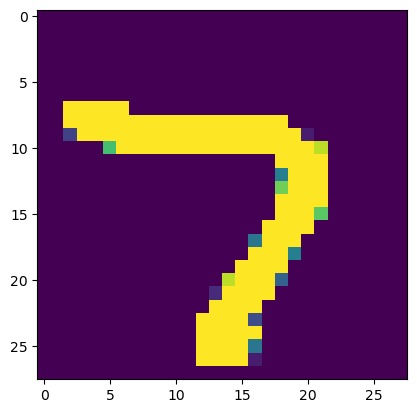

In [229]:
new_img = T.functional.adjust_brightness(img,brightness_factor=10)
plt.imshow(new_img)

### Exercise 6 (OPTIONAL)
1. Try to improve accuracy of the neural network (shown above) for classification problem, using transform data augmentation and other techniques you know.
